### 1 Scipy - обрезка изображения

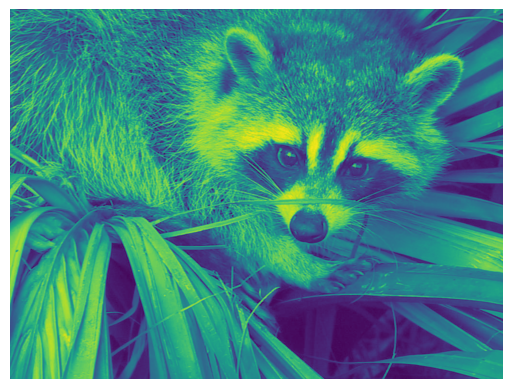

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import datasets

face = datasets.face(gray=True)
plt.imshow(face)
plt.axis('off')
plt.show()

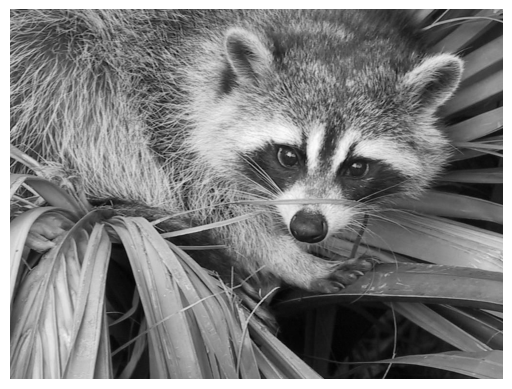

In [2]:
plt.imshow(face, cmap=plt.cm.gray)   
plt.axis('off')
plt.show()

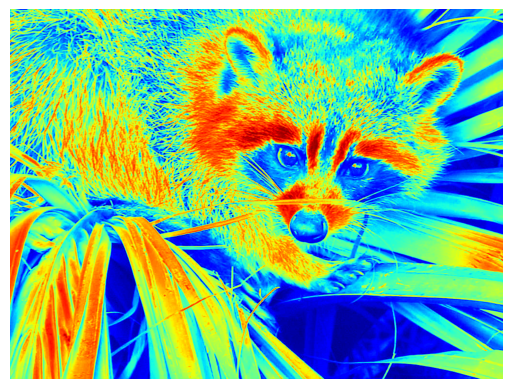

In [3]:
plt.imshow(face, cmap=plt.cm.jet)  
plt.axis('off')
plt.show()

In [4]:
crop_face = face[100:-100, 100:-100]
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx]
y.shape, x.shape

((768, 1), (1, 1024))

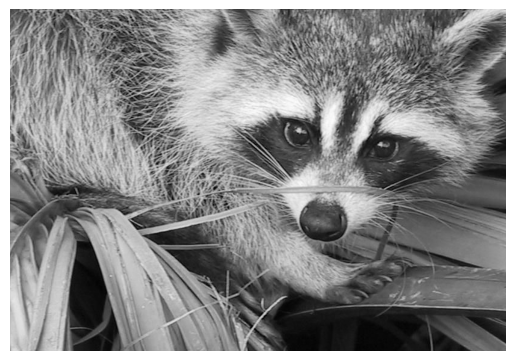

In [5]:
plt.imshow(crop_face, cmap='gray')
plt.axis('off')
plt.show()

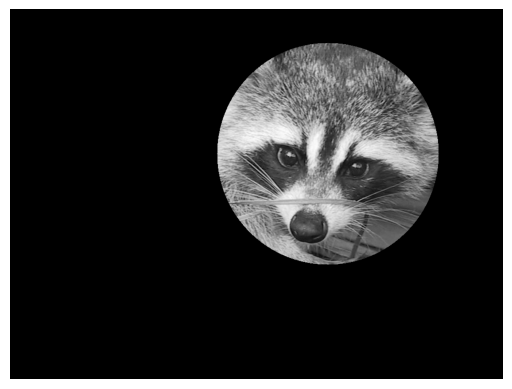

In [6]:
centerx, centery = (660, 300)
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)  
plt.axis('off')
plt.show()

### 2 Работа со статистикой

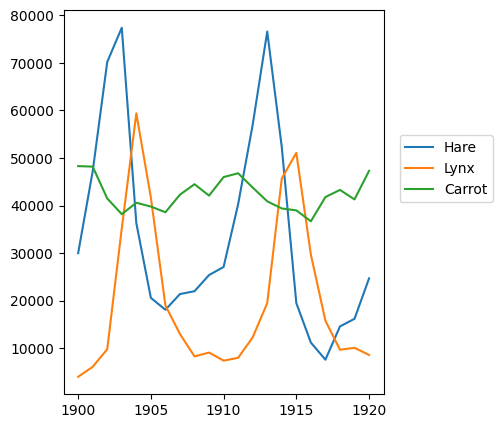

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import requests

url = 'https://scipy-lectures.org/_downloads/populations.txt'
response = requests.get(url)

with open('populations.txt', 'wb') as f:
    f.write(response.content)

data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T

plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 
plt.show()

In [8]:
mean_hares = np.mean(hares)
std_hares = np.std(hares)

mean_lynxes = np.mean(lynxes)
std_lynxes = np.std(lynxes)

mean_carrots = np.mean(carrots)
std_carrots = np.std(carrots)

print("Среднее и стандартное отклонение для зайцев:")
print(f"Mean: {mean_hares}, Std: {std_hares}")
print("\nСреднее и стандартное отклонение для рысей:")
print(f"Mean: {mean_lynxes}, Std: {std_lynxes}")
print("\nСреднее и стандартное отклонение для моркови:")
print(f"Mean: {mean_carrots}, Std: {std_carrots}")

Среднее и стандартное отклонение для зайцев:
Mean: 34080.95238095238, Std: 20897.906458089667

Среднее и стандартное отклонение для рысей:
Mean: 20166.666666666668, Std: 16254.591536908763

Среднее и стандартное отклонение для моркови:
Mean: 42400.0, Std: 3322.5062255844787


In [10]:
max_hares_year = year[np.argmax(hares)]
max_lynxes_year = year[np.argmax(lynxes)]
max_carrots_year = year[np.argmax(carrots)]

print("Год с наибольшей популяцией:")
print(f"Зайцы: {max_hares_year}, Рыси: {max_lynxes_year}, Моркови: {max_carrots_year}")

Год с наибольшей популяцией:
Зайцы: 1903.0, Рыси: 1904.0, Моркови: 1900.0


In [13]:
max_population = np.argmax(np.array([hares, lynxes, carrots]), axis=0)
species = np.array(['Зайцы', 'Рыси', 'Морковь'])
max_species = species[max_population]

print("Вид с наибольшей популяцией в каждый год:")
for y, s in zip(year, max_species):
    print(f"{y}: {s}")

Вид с наибольшей популяцией в каждый год:
1900.0: Морковь
1901.0: Морковь
1902.0: Зайцы
1903.0: Зайцы
1904.0: Рыси
1905.0: Рыси
1906.0: Морковь
1907.0: Морковь
1908.0: Морковь
1909.0: Морковь
1910.0: Морковь
1911.0: Морковь
1912.0: Зайцы
1913.0: Зайцы
1914.0: Зайцы
1915.0: Рыси
1916.0: Морковь
1917.0: Морковь
1918.0: Морковь
1919.0: Морковь
1920.0: Морковь


In [14]:
years_above_50000 = year[np.any([hares > 50000, lynxes > 50000, carrots > 50000], axis=0)]
print("Годы, когда любая популяция превышала 50000:", years_above_50000)

Годы, когда любая популяция превышала 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]


In [15]:
top2_hares_years = year[np.argsort(hares)][:2]
top2_lynxes_years = year[np.argsort(lynxes)][:2]
top2_carrots_years = year[np.argsort(carrots)][:2]

print("Топ 2 года для каждого вида с минимальной популяцией:")
print(f"Зайцы: {top2_hares_years}")
print(f"Рыси: {top2_lynxes_years}")
print(f"Морковь: {top2_carrots_years}")

Топ 2 года для каждого вида с минимальной популяцией:
Зайцы: [1917. 1916.]
Рыси: [1900. 1901.]
Морковь: [1916. 1903.]


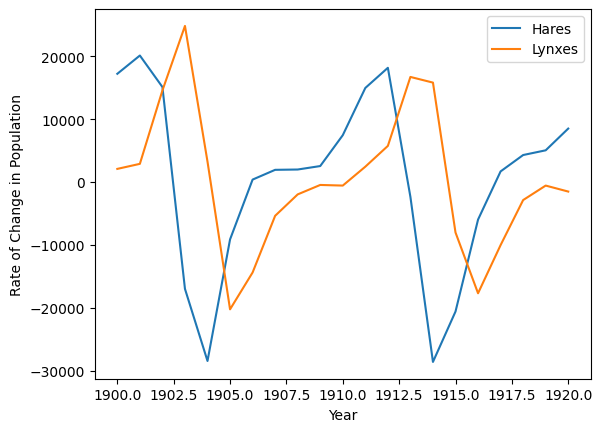

In [24]:
hares_gradient = np.gradient(hares)
lynxes_gradient = np.gradient(lynxes)

plt.plot(year, hares_gradient, label='Hares')
plt.plot(year, lynxes_gradient, label='Lynxes')
plt.xlabel('Year')
plt.ylabel('Rate of Change in Population')
plt.legend()
plt.show()


In [27]:
correlation = np.corrcoef(hares, lynxes)[0, 1]
print("Корреляция между численностью зайцев и рысей:", correlation)

Корреляция между численностью зайцев и рысей: 0.07189206073535571


### 3 Множество Мандельброта

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

In [33]:
def compute_mandelbrot(N_max, some_threshold, nx, ny):
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)
    
    return mandelbrot_set

/tmp/ipykernel_111061/357486055.py:9: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/tmp/ipykernel_111061/357486055.py:9: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


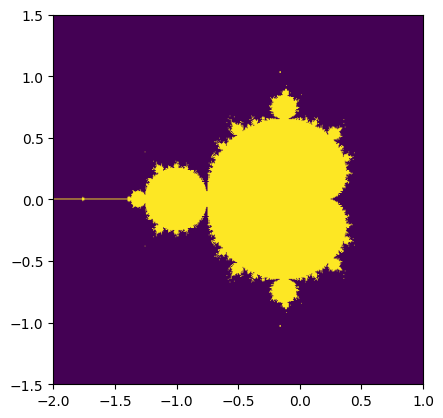

In [34]:
mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.show()